In [63]:
# Import Modules
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Set paths to csv files
call_volume = Path("./data/Call_Volume_20211102.csv")
prices = Path("./data/Stock_Prices_20211102.csv")
put_volume = Path("./data/Put_Volume_20211102.csv")
SPY_prices = Path("./data/SPY_Price_20211102.csv")
short_interest = Path("./data/Short_Interest_20211102.csv")
sub_sectors = Path("./data/Subsectors_20211102.csv")
all_sectors = Path("./data/Sectors_20211102.csv")

#sp500_path = Path("../Resources/sp500.csv")

In [3]:
# Read in csv files
call_volume_df = pd.read_csv(
    call_volume, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

price_df = pd.read_csv(
    prices, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

put_volume_df = pd.read_csv(
    put_volume, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

SPY_prices_df = pd.read_csv(
    SPY_prices, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

short_interest_df = pd.read_csv(
    short_interest, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

sub_sectors_df = pd.read_csv(
    sub_sectors
)

all_sectors_df = pd.read_csv(
    all_sectors
)


#call_volume_df
SPY_prices_df

,SPY
date,
2019-11-01,296.1603
2019-11-04,297.3502
2019-11-05,297.0213
2019-11-06,297.0890
2019-11-07,298.1338
...,...
2021-11-04,466.9100
2021-11-05,468.5300
2021-11-08,468.9300


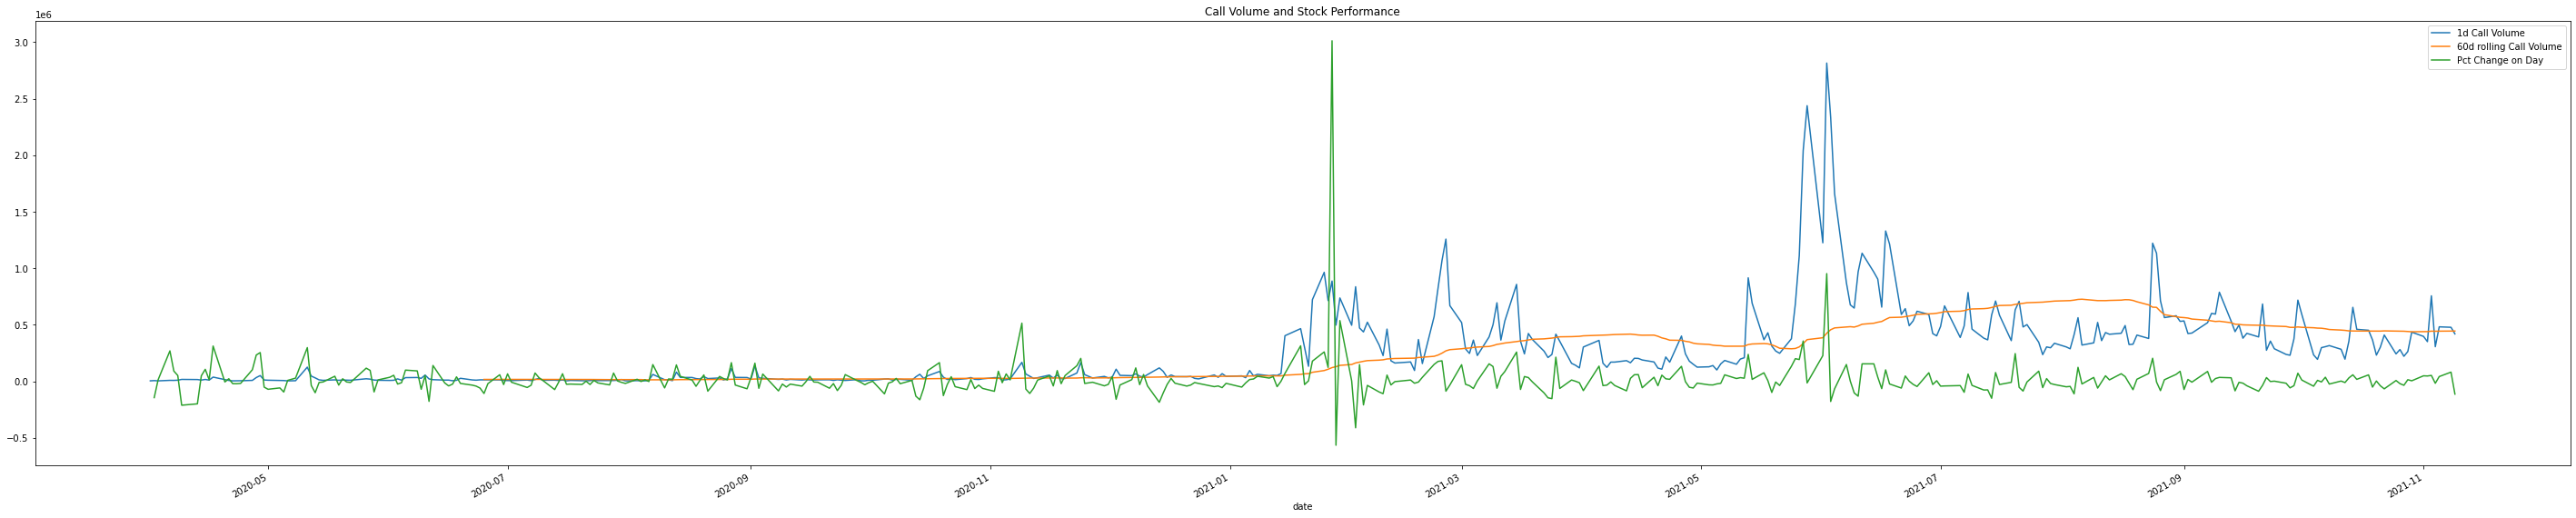

In [64]:
# Calculate the daily percent changes and drop n/a values
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()
#pct_change_five_day = (1+pct_change_one_day).rolling(window=5).apply(np.prod, raw=True) - 1

pct_change_one_day_scaled = pct_change_one_day * 1000000
#pct_change_five_day_scaled = pct_change_five_day * 100000000

#volume_df = volume_df.dropna()

#pct_change_five_day
volume_chart = call_volume_df['AMC'].plot(figsize=(50,10), title="Call Volume and Stock Performance", legend=True, label="1d Call Volume", fontsize=10)
rolling_chart = sixty_day_rolling_volume_df['AMC'].plot(ax=volume_chart, legend=True, label="60d rolling Call Volume")
pct_chart = pct_change_one_day_scaled['AMC'].plot(ax=rolling_chart, legend=True, label="Pct Change on Day")



#pct_change_one_day_scaled['AMC'].plot(ax=pct_chart)



(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

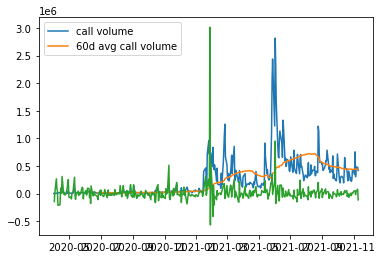

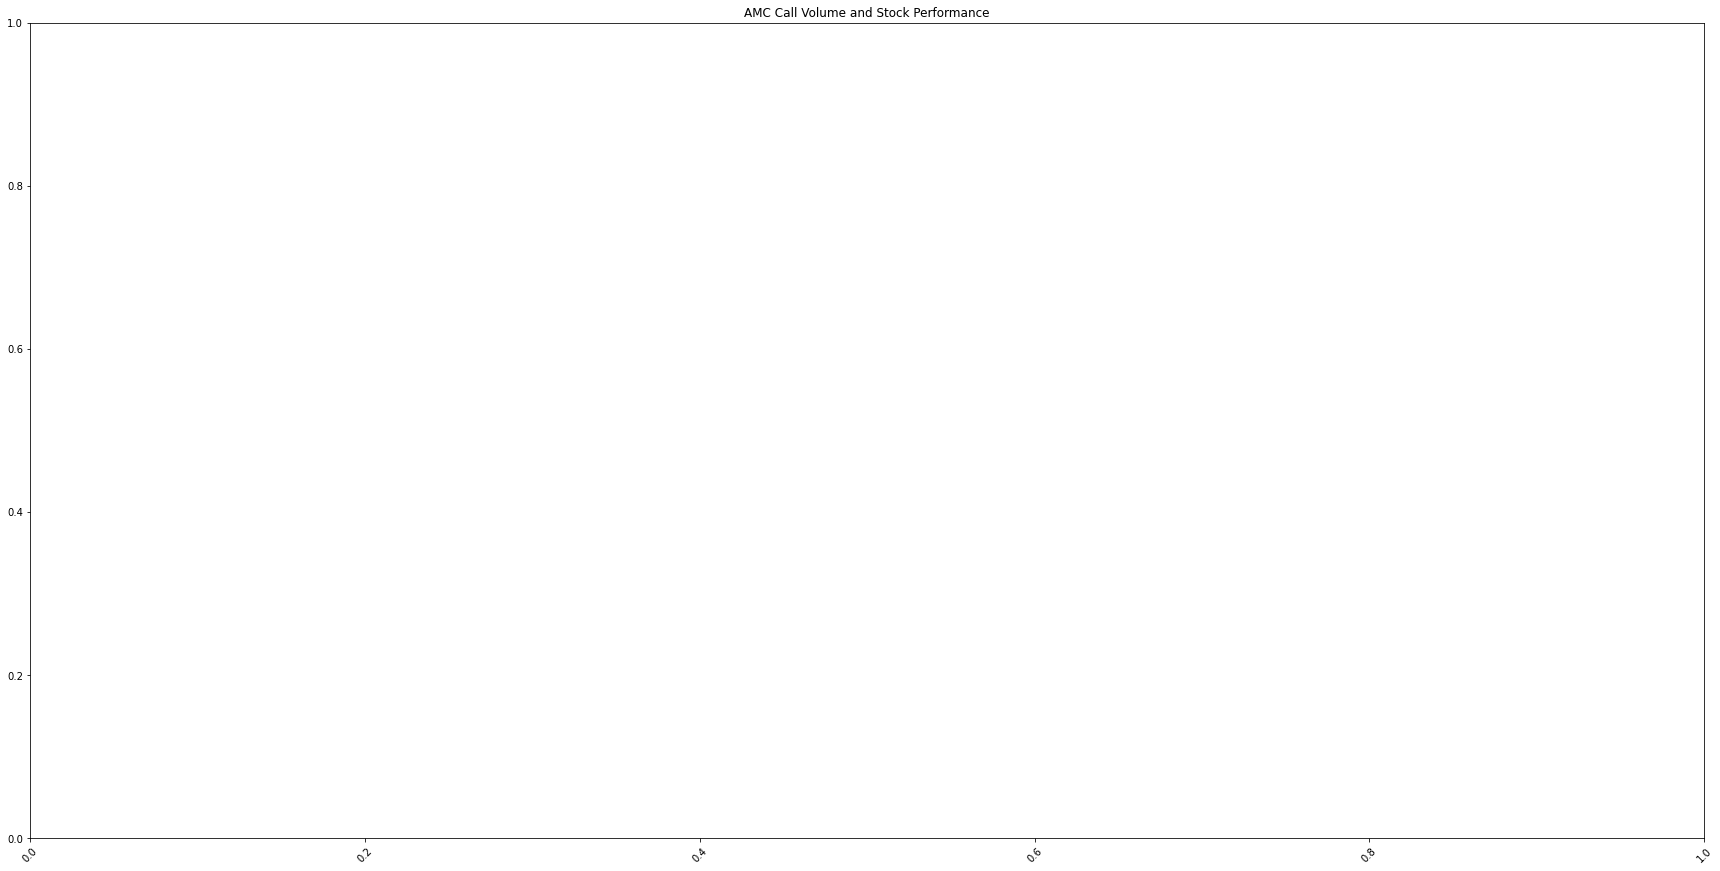

In [79]:
plt.plot(call_volume_df['AMC'], label = "call volume")
plt.plot(sixty_day_rolling_volume_df['AMC'], label = "60d avg call volume")
plt.plot(pct_change_one_day_scaled['AMC'])
plt.legend()
plt.figure(figsize=(30,15))
plt.title("AMC Call Volume and Stock Performance")
plt.xticks(rotation=45)


In [5]:
start_date = "2020-04-01"
end_date = "2021-11-09"

call_volume_df = call_volume_df.loc[start_date:end_date]
put_volume_df = put_volume_df.loc[start_date:end_date]
SPY_prices_df = SPY_prices_df.loc[start_date:end_date]
price_df = price_df.loc[start_date:end_date]

display(SPY_prices_df.head())
#display(put_volume_df.head())

,SPY
date,
2020-04-01,240.7032
2020-04-02,246.2575
2020-04-03,242.6981
2020-04-06,258.9992
2020-04-07,259.2632


In [37]:
#Inputs
#nDay Return
shift = 3
# Call/Put Ratio Threshold
call_put_ratio_threshold = 2
adv_multiple = 4 #avg daily vol

short_interest_threshold = 20
filter_input_sector = "Consumer Discretionary"


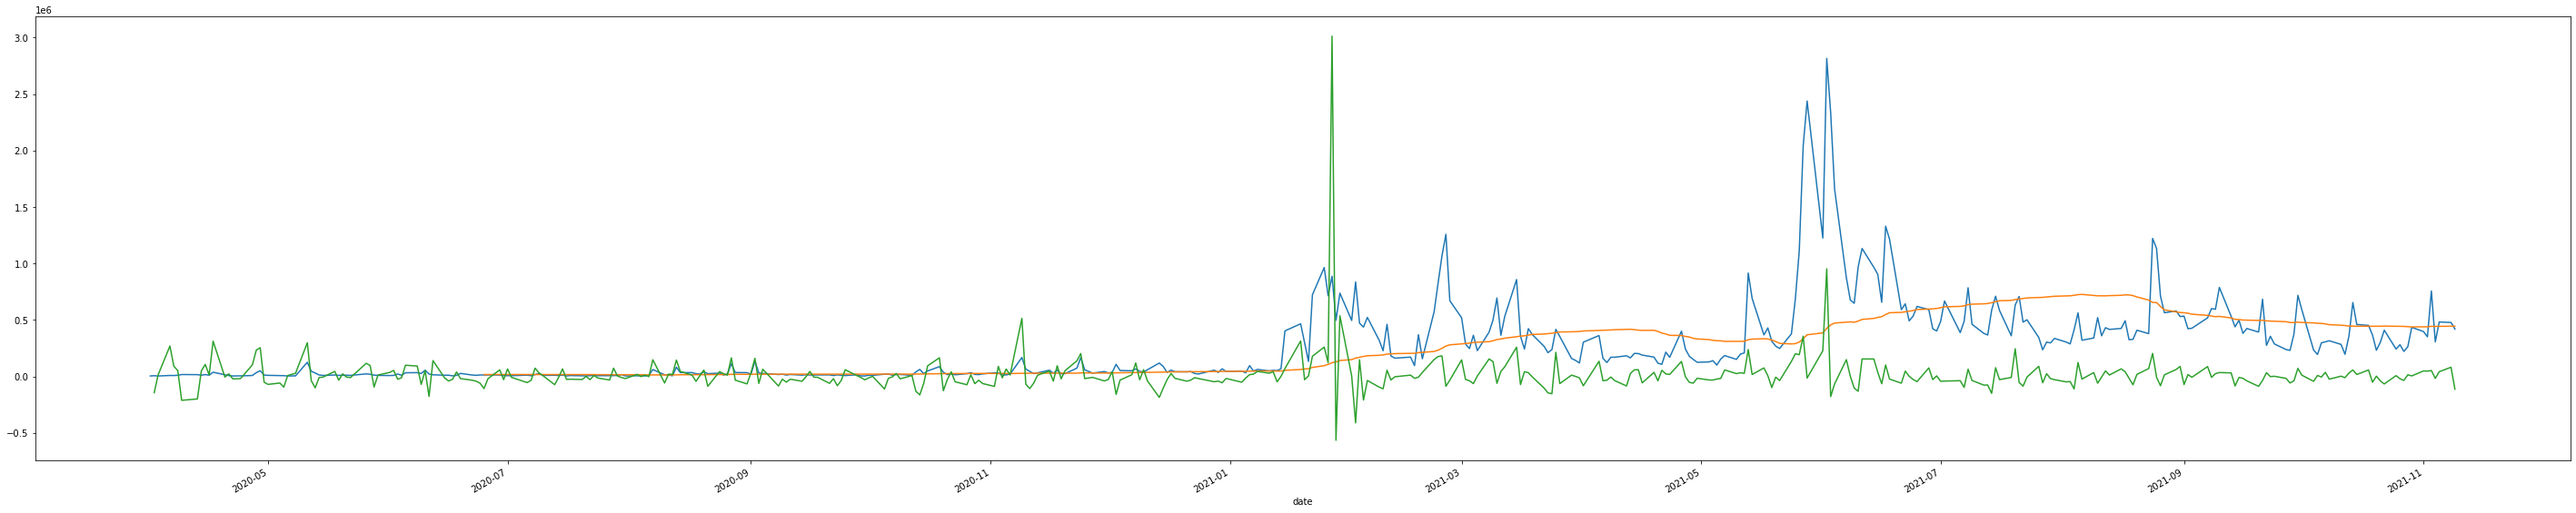

In [7]:
# Calculate the daily percent changes and drop n/a values
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()

#pct_change_five_day = (1+pct_change_one_day).rolling(window=5).apply(np.prod, raw=True) - 1


pct_change_one_day_scaled = pct_change_one_day * 1000000
#pct_change_five_day_scaled = pct_change_five_day * 100000000

#volume_df = volume_df.dropna()

#pct_change_five_day
volume_chart = call_volume_df['AMC'].plot(figsize=(50,10))
rolling_chart = sixty_day_rolling_volume_df['AMC'].plot(ax=volume_chart)
pct_chart = pct_change_one_day_scaled['AMC'].plot(ax=rolling_chart)
#pct_change_one_day_scaled['AMC'].plot(ax=pct_chart)



In [8]:
spy_pct_change = SPY_prices_df.pct_change()
spy_roll_var = spy_pct_change.rolling(60).var()
rolling_cov = pct_change_one_day.rolling(60).cov(spy_pct_change['SPY'])
rolling_beta = rolling_cov.copy()

for ticker in rolling_cov:
    rolling_beta[ticker] = rolling_cov[ticker]/spy_roll_var['SPY']

rolling_beta

,AAPL,AAL,CCL,CMCSA,MU,CLF,TSLA,NIO,FCX,GE,...,RADA,LL,DBI,DOLE,SYK,GDOT,RL,SUMO,CNDT,IO
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,1.358749,0.737064,0.930453,1.167525,0.918293,1.396685,1.031530,1.683827,2.155482,1.148830,...,0.629628,0.580653,1.609585,-0.648227,1.097174,0.979152,1.155737,1.722107,1.622403,0.676167
2021-11-04,1.347630,0.727071,0.903981,1.153245,0.938497,1.372048,1.038647,1.728953,2.099959,1.135526,...,0.632428,0.517738,1.595351,-0.699301,1.075653,1.003530,1.157535,1.736909,1.604470,0.387132
2021-11-05,1.335517,0.799877,0.990401,1.171778,0.988717,1.378887,1.017389,1.734758,2.105326,1.159496,...,0.647324,0.560696,1.613103,-0.699707,1.084628,0.993661,1.169917,1.723962,1.471953,0.435621


In [9]:

shift_amt = shift * -1
shifted = price_df.shift(periods=shift_amt, axis="rows")
period_day_return = shifted/price_df-1

ticker_names = list(period_day_return)

trailing_sixty_day = sixty_day_rolling_volume_df.shift(periods=-1, axis="rows")
volume_indicator = adv_multiple * trailing_sixty_day

good_vol_signal = {}
no_vol_signal = {}

for ticker in ticker_names:
    i = 0
    good_vol_signal[ticker] = []
    no_vol_signal[ticker] = []

    for value in call_volume_df[ticker]:
        date = call_volume_df.index[i]
        if(value > volume_indicator[ticker][i]):
            good_vol_signal[ticker].append(date)
        else:
            no_vol_signal[ticker].append(date)
        i+= 1



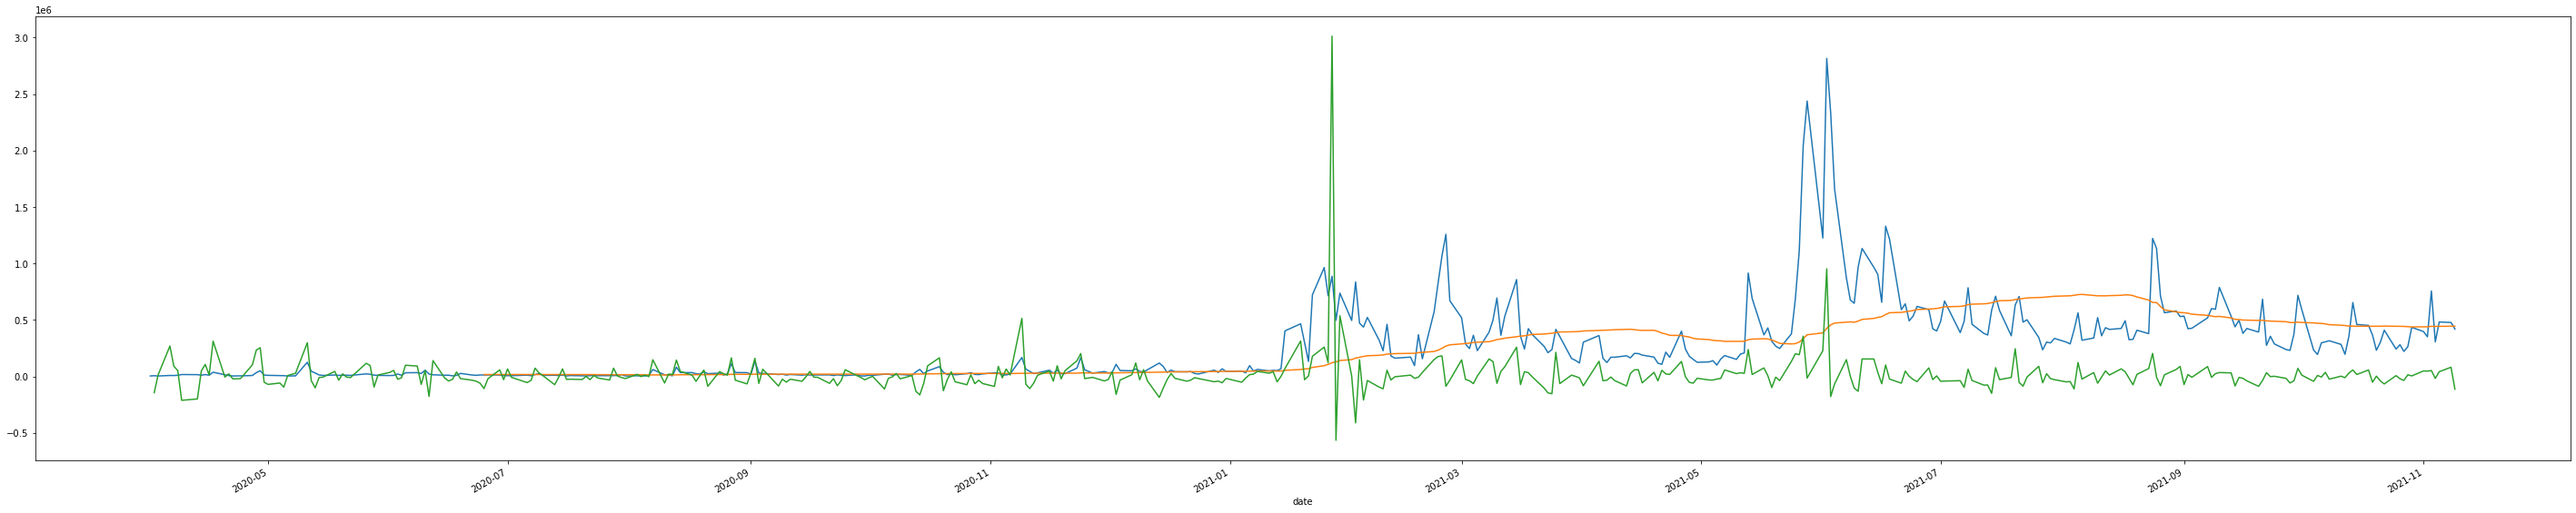

In [10]:
# Calculate the daily percent changes and drop n/a values
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()
#pct_change_five_day = (1+pct_change_one_day).rolling(window=5).apply(np.prod, raw=True) - 1

pct_change_one_day_scaled = pct_change_one_day * 1000000
#pct_change_five_day_scaled = pct_change_five_day * 100000000

#volume_df = volume_df.dropna()

#pct_change_five_day
volume_chart = call_volume_df['AMC'].plot(figsize=(50,10))
rolling_chart = sixty_day_rolling_volume_df['AMC'].plot(ax=volume_chart)
pct_chart = pct_change_one_day_scaled['AMC'].plot(ax=rolling_chart)
#pct_change_one_day_scaled['AMC'].plot(ax=pct_chart)



In [11]:
good_vol_signal["AMC"]

[Timestamp('2020-08-07 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-27 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2020-11-09 00:00:00'),
 Timestamp('2020-11-24 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-20 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-01-25 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-01-27 00:00:00'),
 Timestamp('2021-01-29 00:00:00'),
 Timestamp('2021-02-02 00:00:00'),
 Timestamp('2021-02-25 00:00:00'),
 Timestamp('2021-05-27 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-06-02 00:00:00'),
 Timestamp('2021-06-03 00:00:00')]

In [12]:
#call_volume_df.iloc[2]['AAPL']
#call_volume_df[call_volume_df[ticker]== call_volume_df.iloc[2]['AAPL']].index.values
# notes for pulling index value
# call_volume_df.index[0]



In [13]:
call_put_ratio = call_volume_df / put_volume_df


In [14]:

good_ratio_signal = {}
no_ratio_signal = {}

for ticker in ticker_names:
    i = 0
    good_ratio_signal[ticker] = []
    no_ratio_signal[ticker] = []

    for ratio in call_put_ratio[ticker]:
        date = call_put_ratio.index[i]
        if(ratio > call_put_ratio_threshold):
            good_ratio_signal[ticker].append(date)
        else:
            no_ratio_signal[ticker].append(date)
        i+= 1

In [15]:
good_ratio_signal["AMC"]

[Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-06-02 00:00:00'),
 Timestamp('2020-06-05 00:00:00'),
 Timestamp('2020-07-08 00:00:00'),
 Timestamp('2020-07-09 00:00:00'),
 Timestamp('2020-07-23 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2020-08-11 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-14 00:00:00'),
 Timestamp('2020-08-17 00:00:00'),
 Timestamp('2020-08-18 00:00:00'),
 Timestamp('2020-08-19 00:00:00'),
 Timestamp('2020-08-20 00:00:00'),
 Timestamp('2020-08-21 00:00:00'),
 Timestamp('2020-08-24 00:00:00'),
 Timestamp('2020-08-25 00:00:00'),
 Timestamp('2020-08-26 00:00:00'),
 Timestamp('2020-08-27 00:00:00'),
 Timestamp('2020-08-28 00:00:00'),
 Timestamp('2020-08-31 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2020-09-03 00:00:00'),
 Timestamp('2020-09-04 00:00:00'),
 Timestamp('2020-09-09 00:00:00'),
 Timestamp('2020-09-14 00:00:00'),
 Timestamp('2020-09-16 00:00:00'),
 Timestamp('2020-09-

In [16]:
#Create final signal date lists within dictionaries
good_final_signal = {}
no_final_signal = {}

def intersection (lst1, lst2):
    return list (set(lst1) & set(lst2))

for ticker in ticker_names:
    good_final_signal[ticker] = intersection(good_vol_signal[ticker], good_ratio_signal[ticker])

In [17]:
good_final_signal["AMC"]

[Timestamp('2021-02-25 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2020-11-24 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2021-01-20 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-27 00:00:00'),
 Timestamp('2021-01-25 00:00:00')]

In [18]:
def union (lst1, lst2):
    return list (set(lst1) | set(lst2))

for ticker in ticker_names:
    no_final_signal[ticker] = union(no_vol_signal[ticker], no_ratio_signal[ticker])


In [19]:
market_cap = Path("./data/Market_Cap_20211102.csv")

market_cap_df = pd.read_csv(
    market_cap, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

spy_shifted = SPY_prices_df.shift(periods=shift_amt, axis="rows")
spy_period_day_return = spy_shifted/SPY_prices_df-1

#beta_adj_outperf = (period_day_return/rolling_beta)

beta_adj_outperf = period_day_return.copy()
for ticker in ticker_names:
    beta_adj_outperf[ticker] = period_day_return[ticker] - (spy_period_day_return['SPY'] * rolling_beta[ticker])

display(beta_adj_outperf)

,AAPL,AAL,CCL,CMCSA,MU,CLF,TSLA,NIO,FCX,GE,...,RADA,LL,DBI,DOLE,SYK,GDOT,RL,SUMO,CNDT,IO
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,-0.017790,0.071849,0.052857,-0.000379,0.038137,0.028848,-0.051294,0.025710,0.011862,0.012712,...,0.024830,-0.038993,-0.023312,-0.044963,0.003634,-0.014365,0.038497,-0.015012,-0.156751,-0.267489
2021-11-04,-0.000892,0.078279,0.055471,0.018183,0.045428,0.021613,-0.168871,-0.059254,0.057346,0.056646,...,0.033979,-0.012194,0.016576,0.024756,0.017839,-0.013356,0.037111,0.015593,-0.139595,-0.068351
2021-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
beta_adj_outperf.describe().transpose()['max'].dropna().sort_values()

WEBR     0.001921
DOLE     0.024756
CCV      0.030472
ALTU     0.032874
PG       0.039150
          ...    
BNGO     4.413574
AMC      4.729029
WIMI     6.070101
OCGN     7.861733
KODK    14.788829
Name: max, Length: 1190, dtype: float64

In [21]:
good_signal_returns = {}
no_signal_returns = {}

for ticker in ticker_names:
    good_signal_returns[ticker] = []
    no_signal_returns[ticker] = []
    for date in good_final_signal[ticker]:
        change = beta_adj_outperf.loc[date][ticker]
        good_signal_returns[ticker].append(change)
    for date in no_final_signal[ticker]:
        change = beta_adj_outperf.loc[date][ticker]
        no_signal_returns[ticker].append(change)
      
    

In [22]:
total=0
for ticker in ticker_names:
    total = total + len(good_signal_returns[ticker])
print(total)

9511


In [23]:
totalno=0
for ticker in ticker_names:
    totalno = totalno + len(no_signal_returns[ticker])
print(totalno) 

476040


In [38]:


short_interest_max  = {}
for ticker in short_interest_df:
    short_interest_max[ticker] = short_interest_df[ticker].max()

filtered_short_interest = []
for ticker in short_interest_max:
    if(short_interest_max[ticker] > short_interest_threshold):
        filtered_short_interest.append(ticker)

len(filtered_short_interest)

286

In [25]:
all_sector_names = all_sectors_df['value']
all_sectors_unique = all_sector_names.unique()
all_sectors_unique

array(['Materials', 'Financials', 'Consumer Discretionary',
       'Information Technology', 'Industrials', 'Communication Services',
       'Health Care', 'Consumer Staples', 'Energy', 'Utilities',
       'Real Estate', nan], dtype=object)

In [26]:

#all_sectors_unique

filtered_tickers_df = all_sectors_df[all_sectors_df.value == filter_input_sector]
#filtered_tickers_df = all_sectors_df
sector_filtered_list = filtered_tickers_df['ticker'].tolist()
filtered_tickers_df.head()



,Unnamed: 0,ticker,value
0,0,CLF,Materials
1,1,JPM,Financials
2,2,LCID,Consumer Discretionary
3,3,PYPL,Information Technology
4,4,NCLH,Consumer Discretionary


In [39]:
import math

good_signal_returns_list = []
#filtered_ticker_names = sector_filtered_list #filtered_short_interest #['BBBY']

filtered_ticker_names = intersection(sector_filtered_list, filtered_short_interest)

for ticker in filtered_ticker_names:
    good_signal_returns_list = good_signal_returns_list + good_signal_returns[ticker]

no_signal_returns_gross_list = []
for ticker in filtered_ticker_names:
    no_signal_returns_gross_list = no_signal_returns_gross_list  + no_signal_returns[ticker]
no_signal_returns_list = [x for x in no_signal_returns_gross_list if np.isnan(x) == False]
len(no_signal_returns_list)


good_signal_returns_list = [x for x in good_signal_returns_list if math.isnan(x) == False]

In [61]:
#import matplotlib.pyplot as plt

#plt.hist(good_signal_returns['AMC'], density=True, bins=300)  # density=False would make counts
#plt.axis([-.5, 5, 0, 10]) 
#good_signal_returns_list.plot.hist()

import hvplot.pandas

good_signal_returns_list_df = pd.DataFrame(good_signal_returns_list, columns=['Beta-Adjusted Outperformance Returns'])



#good_signal_returns_list_df.groupby('returns').size()

good_signal_returns_list_df.hvplot.hist(bins=700, xlim=(-1,2), title="Frequency of Outperformance Returns in Signalled Dates")




:Histogram   [Beta-Adjusted Outperformance Returns]   (Beta-Adjusted Outperformance Returns_count)

In [41]:
good_signal_returns_list_df.describe()
#good_signal_returns_list_df.describe().transpose()['mean']

,returns
count,2239.000000
mean,0.014192
std,0.204415
min,-0.663715
25%,-0.060028
50%,-0.006081
75%,0.049622
max,4.729029


In [60]:
no_signal_returns_list_df = pd.DataFrame(no_signal_returns_list)
no_signal_returns_list_df.columns = ["Beta-Adjusted Outperformance Returns"]
no_signal_returns_list_df.hvplot.hist(bins=2000, xlim=(-1,2), title="Frequency of Outperformance Returns in Control Dates")

:Histogram   [Beta-Adjusted Outperformance Returns]   (Beta-Adjusted Outperformance Returns_count)

In [31]:
no_signal_returns_list_df.describe()


,0
count,188366.000000
mean,0.003097
std,0.109833
min,-0.859527
25%,-0.038425
50%,-0.002741
75%,0.033171
max,14.788829


In [43]:

print(np.var(good_signal_returns_list))

0.04176675591569786


In [44]:
print(np.var(no_signal_returns_list))

0.0172044913024338


In [50]:
tt, pvalue = ttest_ind(a=good_signal_returns_list, b=no_signal_returns_list, equal_var=True)
display(f"The T-stat is {tt :.2f}")
display(f"The p-value is {100*pvalue :.2f}%")

'The T-stat is 3.59'

'The p-value is 0.03%'

In [35]:
np.mean(good_signal_returns_list)

0.0031010701265734896

In [36]:
np.mean(no_signal_returns_list)

0.003097058999142575